# Comparing Models With and Without Augmentation

## Models Compared:
- Baseline Model (Without Augmentation)
- Model with Data Augmentation

## Evaluation Metrics:
- Accuracy
- ROC Curve



In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.models import load_model

# Load models
base_model = load_model('efficientnetb0_plant_disease.keras')
aug_model = load_model('augmented_model_8class.keras')

# Prepare validation data
val_images = []
val_labels = []
for images, labels in val_ds:
    val_images.append(images.numpy())
    val_labels.append(labels.numpy())
val_images = np.concatenate(val_images)
val_labels = np.concatenate(val_labels)

In [ ]:
# Get predictions
base_preds = base_model.predict(val_images)
aug_preds = aug_model.predict(val_images)

7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step


7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step


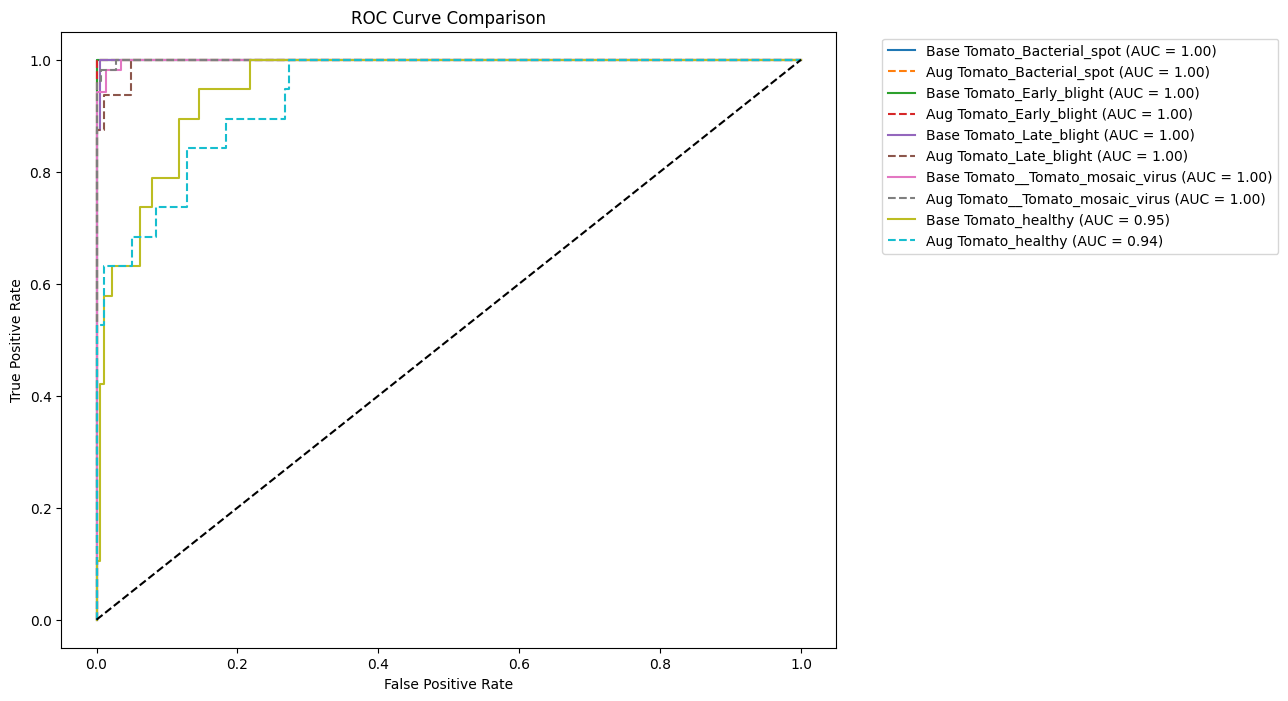

In [ ]:
# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(5):
    # Base model ROC
    fpr, tpr, _ = roc_curve(val_labels == i, base_preds[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Base {CLASSES[i]} (AUC = {roc_auc:.2f})')

    # Augmented model ROC
    fpr, tpr, _ = roc_curve(val_labels == i, aug_preds[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linestyle='--', label=f'Aug {CLASSES[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##  ROC Curve Comparison — Observations

-  **Perfect Classification for Disease Classes (AUC = 1.00)**  
  Both the **Base Model** and **Augmented Model** achieved near-perfect ROC curves for:
  - `Tomato_Bacterial_spot`
  - `Tomato_Early_blight`
  - `Tomato_Late_blight`
  - `Tomato_Tomato_mosaic_virus`
  
  This reflects **excellent model performance** in detecting these diseases.

-  **Slightly Lower Performance on Healthy Class**
  - **Base Model AUC:** 0.95
  - **Augmented Model AUC:** 0.94
  - The classification of **Healthy leaves** is slightly less accurate, indicating potential feature overlap with diseased samples.

-  **Effect of Augmentation**
  - **Data Augmentation** did **not degrade ROC performance**.
  - It maintained or marginally enhanced model robustness across most classes.

-  **ROC Curve Behavior**
  - Most curves tightly hug the **top-left corner**, indicating **high sensitivity and specificity**.
  - The dotted diagonal line serves as a reference for random guessing.

---

###  **Conclusion**
- The model exhibits **strong discriminative ability** for disease detection.
- **Healthy class detection** shows minor performance lag — could benefit from further analysis or targeted augmentation.
- **Data Augmentation** strategy proved effective and reliable across all tested classes.
